In [2]:
import pandas as pd #FOR PREPROCESSING
import seaborn as sns #FOR PLOTS
import matplotlib.pyplot as plt #FOR PLOTS
import xgboost

In [3]:
ds=pd.read_csv("Churn_Modelling.csv")
ds

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
ds.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
ds.drop_duplicates()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
ds.drop(['RowNumber','CustomerId','Surname'], axis=1,inplace=True)
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


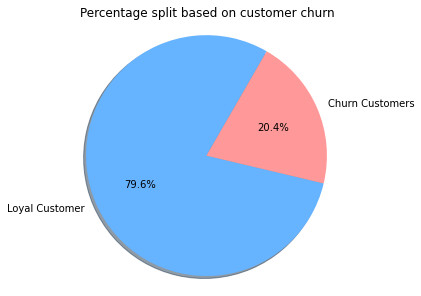

In [8]:
ExitedValues = ds.Exited.value_counts()
labels = ["Loyal Customer","Churn Customers"]
colors = ['#66b3ff', '#ff9999']
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.title('Percentage split based on customer churn')
plt.show()

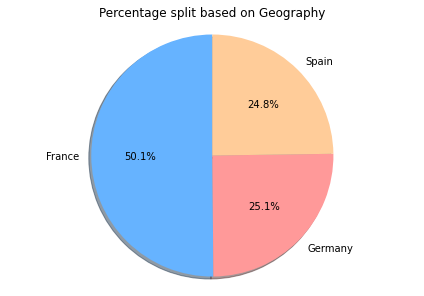

In [9]:
Geovalues  = ds['Geography'].value_counts().values.tolist()
Geolabels  = ds['Geography'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999' , '#ffcc99']
fig2, f2 = plt.subplots()
f2.pie(Geovalues,labels=Geolabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90) 
f2.axis('equal')
plt.tight_layout()
plt.title('Percentage split based on Geography')
plt.show()

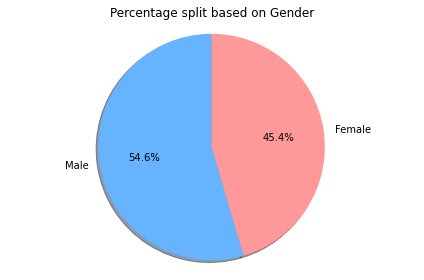

In [10]:
Gendervalues  = ds['Gender'].value_counts().values.tolist()
GenderLabels = ds['Gender'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999']
fig3, f3 = plt.subplots()
f3.pie(Gendervalues,labels=GenderLabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle= 90) 
f3.axis('equal')
plt.title('Percentage split based on Gender')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'CreditScore')

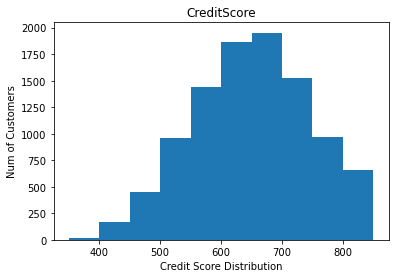

In [11]:
plt.hist(ds['CreditScore'])
plt.xlabel('Credit Score Distribution')
plt.ylabel('Num of Customers')
plt.title('CreditScore')

Text(0, 0.5, 'Num of Customers exited')

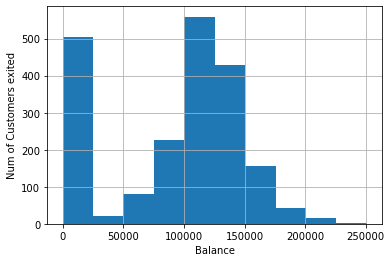

In [12]:
testds=ds[ds.Exited==1]
testds.Balance.hist()
plt.xlabel('Balance')
plt.ylabel('Num of Customers exited')


Text(0, 0.5, 'Num of Customers exited')

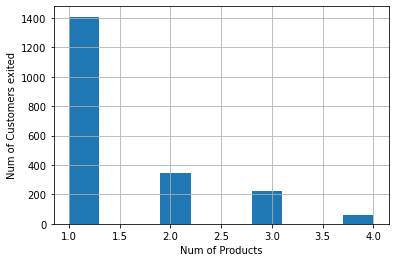

In [13]:
testds.NumOfProducts.hist()
plt.xlabel('Num of Products')
plt.ylabel('Num of Customers exited')


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

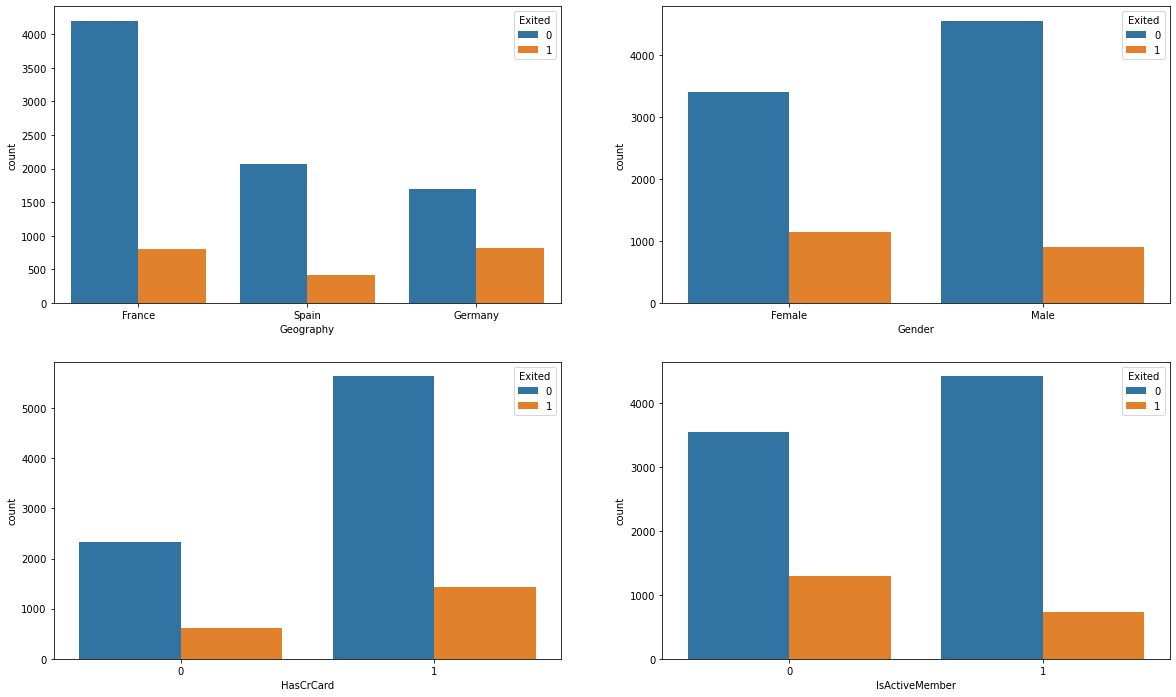

In [14]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = ds, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = ds, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = ds, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = ds, ax=axarr[1][1])

In [15]:
#ONE HOT ENCODING
geo=pd.get_dummies(ds.Geography).iloc[:,:]
geo

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [16]:
gen=pd.get_dummies(ds.Gender).iloc[:,:]
gen

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [17]:
temp=ds.drop(['Geography','Gender'],axis=1)


In [18]:
ds=pd.concat([temp,geo,gen], axis=1)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [19]:
dsf= ds.drop(['Exited'], axis=1)

In [20]:
dsl=ds['Exited']
dsl

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Split dataset into training set and test set
train_features, test_features, train_labels, test_labels = train_test_split(dsf, dsl, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr=LogisticRegression()

In [25]:
lr.fit(train_features, train_labels)

LogisticRegression()

In [26]:
a = lr.predict(test_features)

print(a)

[0 0 0 ... 0 0 0]


In [27]:
#x=lr.predict([[772,42,3,928888.31,2,1,0,92888.52,0,1,0,0,1]])
#print(x)
x=lr.predict([[502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0]])
print(x)

[0]


C:\Users\AYUSH GUNDAWAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
#y=lr.predict([[660,45,12,923456,3,1,0,113931.57,1,0,0,1,0]])
#print(y)

In [29]:
if x==0:
    print('The customer will not leave the bank')
else:
    print('The customer will leave the bank')

The customer will not leave the bank


In [30]:
from sklearn.metrics import  accuracy_score
print("Accuracy:",accuracy_score(test_labels,a))

Accuracy: 0.784


In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_labels, a))

[[2316   63]
 [ 585   36]]


In [32]:
from sklearn.model_selection import train_test_split

X=ds[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','France','Germany','Spain','Female','Male']]  # Features
y=ds['Exited']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [33]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=200)

#Train the model using the training sets 
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [34]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8596666666666667


In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2307   92]
 [ 329  272]]


In [36]:
import numpy as np
features_label = X_train.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.229989
 2) Age                            0.145542
 3) Tenure                         0.140788
 4) Balance                        0.139304
 5) NumOfProducts                  0.138556
 6) HasCrCard                      0.084138
 7) IsActiveMember                 0.040460
 8) EstimatedSalary                0.023006
 9) France                         0.018277
10) Germany                        0.011197
11) Spain                          0.010049
12) Female                         0.009460
13) Male                           0.009234


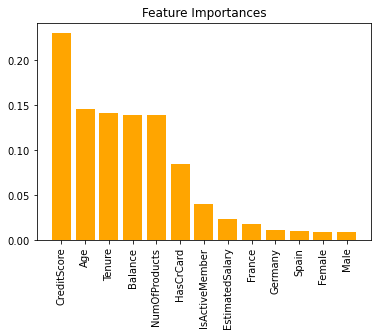

In [37]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color = "orange", align = "center")
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90)
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
clf1 = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf1 = clf1.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf1.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2051  348]
 [ 296  305]]


In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7853333333333333


In [42]:
import numpy as np
features_label = X_train.columns
importances = clf1.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i], importances[indices[i]]))

 1) CreditScore                    0.205177
 2) Age                            0.162941
 3) Tenure                         0.147387
 4) Balance                        0.143508
 5) NumOfProducts                  0.133171
 6) HasCrCard                      0.063975
 7) IsActiveMember                 0.052978
 8) EstimatedSalary                0.023598
 9) France                         0.022674
10) Germany                        0.015552
11) Spain                          0.011241
12) Female                         0.010941
13) Male                           0.006854


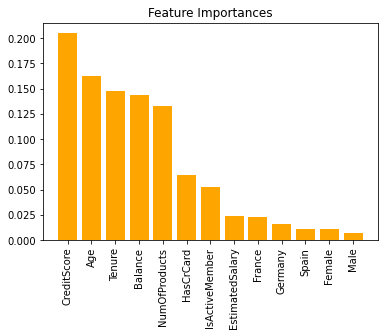

In [43]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color = "orange", align = "center")
plt.xticks(range(X_train.shape[1]), features_label, rotation = 90)
plt.show()

In [49]:
from xgboost import XGBClassifier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#building the model & printing the score
xgb_model = XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)


In [51]:
y_pred = xgb_model.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2275  104]
 [ 297  324]]


In [53]:
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.89
Accuracy of XGB classifier on test set: 0.87


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.76      0.52      0.62       621

    accuracy                           0.87      3000
   macro avg       0.82      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

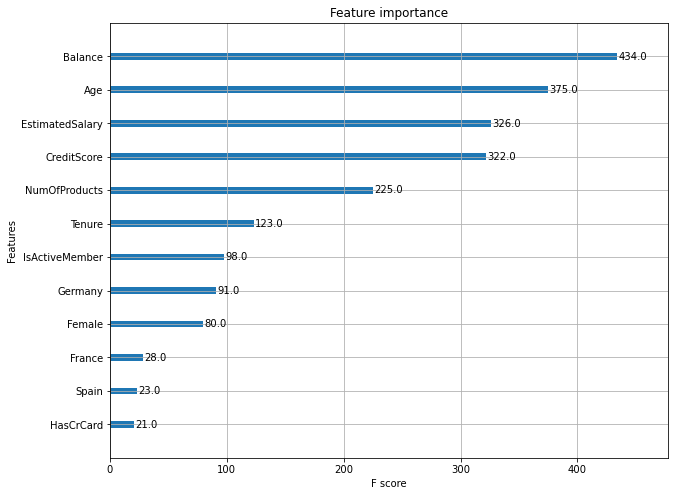

In [55]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [56]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

In [57]:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

In [58]:
log = cross_validate(lr, X, y, cv=5, scoring=scoring)
rfc = cross_validate(clf,  X, y, cv=5, scoring=scoring)
dtr = cross_validate(clf1,  X, y, cv=5, scoring=scoring)
xgb = cross_validate(xgb_model,X,y,cv=5, scoring=scoring)



In [59]:
models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                      
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                   
                                        'XG-BOOST'     :[xgb['test_accuracy'].mean(),
                                                       xgb['test_precision'].mean(),
                                                       xgb['test_recall'].mean(),
                                                       xgb['test_f1_score'].mean()]},
                                       
                                    
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])


In [60]:
 models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)

In [61]:
models_scores_table

,Logistic Regression,Decision Tree,Random Forest,XG-BOOST,Best Score
Accuracy,0.790300,0.792200,0.861900,0.865600,XG-BOOST
Precision,0.397260,0.490243,0.766577,0.777879,XG-BOOST
Recall,0.057431,0.517442,0.463424,0.477172,Decision Tree
F1 Score,0.100339,0.503367,0.577258,0.590974,XG-BOOST


In [1]:
    from sklearn.metrics import roc_curve, roc_auc_score

In [64]:
y_pred_proba_lr = lr.predict_proba(test_features)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_labels,  y_pred_proba_lr)

In [65]:
y_pred_proba_clf = clf.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_clf)

In [66]:
y_pred_proba_clf1 = clf1.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_clf1)

In [67]:
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_xgb)

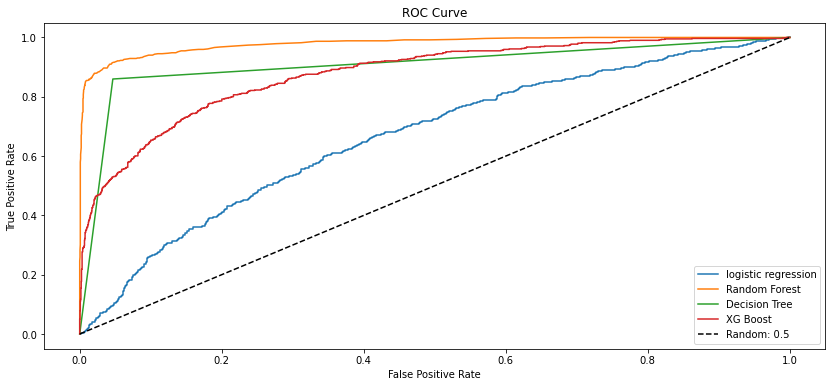

In [83]:
plt.figure(figsize = (14,6),linewidth=1)
plt.plot(fpr,tpr,label='logistic regression')
plt.plot(fpr1,tpr1,label='Random Forest')
plt.plot(fpr2,tpr2,label='Decision Tree')
plt.plot(fpr3,tpr3,label='XG Boost')
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()